In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import time

In [81]:
###

In [82]:
#read file
data = pd.read_csv('cancer.txt', sep=",", header=None)

In [83]:
data.shape

(699, 11)

In [84]:
#remove first column containing ids
data = data.drop(data.columns[0], axis=1)

In [85]:
data.shape

(699, 10)

In [86]:
#remove non-neumerical data
from numpy import NaN
for i in range(data.shape[1]):
    for j in range(data.shape[0]):
        if data.iloc[j,i] == '?':
            data.iloc[j,i] = data[i].mean()

In [87]:
#data = data.fillna(data.mode().iloc[0])
ndata =data.values

In [88]:
ndata.shape
ndata.astype('float32')

array([[ 5.,  1.,  1., ...,  1.,  1.,  2.],
       [ 5.,  4.,  4., ...,  2.,  1.,  2.],
       [ 3.,  1.,  1., ...,  1.,  1.,  2.],
       ...,
       [ 5., 10., 10., ..., 10.,  2.,  4.],
       [ 4.,  8.,  6., ...,  6.,  1.,  4.],
       [ 4.,  8.,  8., ...,  4.,  1.,  4.]], dtype=float32)

In [89]:
x = ndata[:,:9]
y = ndata[:,9]//4
print(np.max(y))
print(np.min(y))
print(x.shape)

1
0
(699, 9)


In [90]:
num_feats = x.shape[1]
x.astype(float)
for i in range(num_feats):
    t = x[:,i]
    t = t.astype('float32')
    #print(type(t))
    #print(t.shape)
    x[:,i] = (t - np.min(t))/(np.max(t) - np.min(t))
    

In [91]:
#add bias term
b = np.ones((x.shape[0],1))
x = np.hstack((x,b))
print(x.shape)

(699, 10)


In [92]:
xtr,x_test,ytr,y_test = train_test_split(x,y,test_size=0.3)

In [93]:
print(ytr.shape)
print(y_test.shape)
print(xtr.shape)
print(x_test.shape)

(489,)
(210,)
(489, 10)
(210, 10)


In [94]:
#uniform random initialization of weights
w = np.random.uniform(0.0,1.0,x.shape[1]).reshape(x.shape[1],1)
print(w)
print(w.shape)

[[4.34654280e-01]
 [3.87676296e-01]
 [1.95208580e-01]
 [6.67443819e-01]
 [9.47933842e-01]
 [9.43123775e-01]
 [8.53853484e-01]
 [7.19655812e-01]
 [8.53915915e-04]
 [3.68260582e-01]]
(10, 1)


In [95]:
#define hyper-parameters
epochs = 20000
a = 0.02

In [96]:
#logistic regression with constant learning rate 
t1 = time.time()

train_acc = []
test_acc = []

m = xtr.shape[0]
n = xtr.shape[1]

mte = x_test.shape[0]

for i in range(epochs):
    z = np.dot(xtr,w)
    z = z.astype('float')
    ybar = 1/(1+np.exp(-z))
    ybar = ybar.flatten()
    
    #cross-entropy loss in training set
    err = -np.sum(((1-ytr)*np.log(1-ybar)+ytr*np.log(ybar)))/m
    
    train_acc.append(err)
    
    #cross-entropy loss in test set
    tmp1 = np.dot(x_test,w)
    tmp1 = tmp1.astype('float')
    tmp = 1/(1+np.exp(-tmp1))
    tmp = tmp.flatten()
    
    term1 = (1.0 - y_test)
    term2 = np.log(1.0 - tmp)
    term3 = y_test
    term4 = np.log(tmp)    
    tmp_err = -np.sum(term1*term2 - term3*term4)/mte
    test_acc.append(tmp_err)
    
    #calculate gradient
    one_y = 1 - ytr
    one_yhat = (1 - ybar)
    
    for j in range(n):
        xcurr = xtr[:,j]
        
        ntmp = (one_y*ybar - one_yhat*ytr)*xcurr
        del_w = np.sum(ntmp)/m 
        w[j] = w[j] - a*del_w

    #if(i%500 == 0):
        
        #print("Train Error", err)
        #print("Test Error", tmp_err)

        
t2 = time.time()
print("Average Time Taken per Epoch: ", (t2-t1)/epochs)
print("Total Time Taken: ",t2-t1)
print("Minimum Training Loss: ", min(train_acc))
print("Minimum Test Loss: ", min(test_acc))
print("Final Training Loss: ", train_acc[-1])
print("Final Test Loss: ", test_acc[-1])

Average Time Taken per Epoch:  0.0018555188298225403
Total Time Taken:  37.110376596450806
Minimum Training Loss:  0.09235525189389937
Minimum Test Loss:  0.0364458276746473
Final Training Loss:  0.09235525189389937
Final Test Loss:  0.03666940316003545


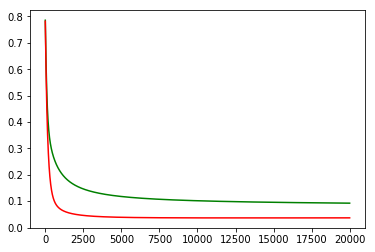

In [97]:
x_axis = np.arange(len(test_acc))
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(x_axis,train_acc,'g')
plt.plot(x_axis,test_acc,'r')
plt.show()

In [98]:
tmp = tmp//0.51
tmp = tmp.astype('int')

In [99]:
d = tmp - y_test
dacc = np.abs(d)
acc = np.sum(dacc)/tmp.shape[0]
print(acc)

0.02857142857142857


In [100]:
y_true = list(y_test)
y_pred = list(tmp)
score = f1_score(y_true, y_pred, average='macro')
print(score)

0.9678571428571429
